# Intuitive Explanation For Code

## Import Package

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [3]:
np.set_printoptions(linewidth=200)
np.set_printoptions(precision=6)

## What does np.logspace mean?
### Let values in linspace = x, values in logspace = y;  
$log_{10}(y) = x$ :  
$log_{10}(1) = 0$,  
$log_{10}(1.258925) = 0.1$  
...  

**or** 

$10^{x} = y$ :  
$10^{0} = 1$,  
$10^{0.1} = 1.258925$  
...

In [6]:
lin_seq = np.linspace(start=0, stop=1, num=11)
log_seq = np.logspace(start=0, stop=1, num=11)
print('x:', lin_seq)
print('y:', log_seq)
print('y to x:', np.log10(log_seq))
print('x to y:', np.array([10**i for i in lin_seq]))

x: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
y: [ 1.        1.258925  1.584893  1.995262  2.511886  3.162278  3.981072  5.011872  6.309573  7.943282 10.      ]
y to x: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
x to y: [ 1.        1.258925  1.584893  1.995262  2.511886  3.162278  3.981072  5.011872  6.309573  7.943282 10.      ]


### We can see y in logspace will be like x in linspace(equally divided)

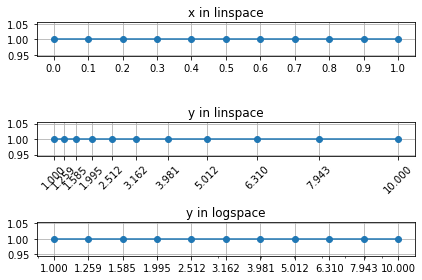

In [7]:
fig, axs = plt.subplots(3, 1)
axs[0].plot(lin_seq, [1]*11, 'o-')
axs[0].set_xticks(lin_seq)
axs[0].set_title('x in linspace')
axs[0].grid()

axs[1].plot(log_seq, [1]*11, 'o-')
axs[1].set_xticks(log_seq)
axs[1].set_title('y in linspace')
axs[1].grid()
plt.setp(axs[1].xaxis.get_majorticklabels(), rotation=45)

axs[2].plot(log_seq, [1]*11, 'o-')
axs[2].set_xscale('log')
axs[2].set_xticks(log_seq)
axs[2].get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axs[2].set_title('y in logspace')
axs[2].grid()
plt.tight_layout()
plt.show()

## What does Mmax mean?
When calculate Allan variance, we compute Mmax as follow:  
```N = len(data)```  
```Mmax = 2**np.floor(np.log2(N / 2))```  

$M_{max}$ means the maximum number of the clusters.  
But why $M_{max} = 2^{floor(log_2(\frac{N}{2}))}$ ?

The formula of Allan variance is:  
$\sigma^2(\tau) = \frac{1}{(2\tau^2)(N-2m)} \sum_{k=1}^{N-2m} (\theta_{k+2m} - 2\theta_{k+m} + \theta_k)^2$  

To obtain a valid Allan variance, $N-2m \geq 1$  
We can get $\frac{N-1}{2} \geq m \implies log_2{\frac{N-1}{2}} \geq log_2m$  
We know:  
$x^{log_xy} \stackrel{log_x}{\rightarrow} log_x{x^{log_xy}} = log_xy \times log_xx = log_xy$  
$log_2{\frac{N-1}{2}} \geq log_2m$  
$2^{log_2{\frac{N-1}{2}}} \geq 2^{log_2m}$  
$2^{log_2{\frac{N-1}{2}}} \geq m$

## Why M should be integer and unique?
When calculate Allan variance, we compute M as follow:  
```M = np.logspace(np.log10(1), np.log10(M_max), num=max_num_M)```  
```M = np.ceil(M)```  
```M = np.unique(M)```  
In Numpy, ```np.logspace``` are represented by log operation with base 10.  
1. If we want to determine number of clusters in logspace, we should use ```np.log10(x)``` to represent.  2. Because clusters cannot be decimal, so we should transform it into integer.  
3. 

In [8]:
np.array

2.0